# 9. Thresholding

A very standard operation in image processing is to try to identify objects in an image using their intensity. For that one sets a threshold above which pixels are considered significant and one can analyze that output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io

## 9.1 Importing the image

Let's import the image, plot it and check its dimensions:

In [2]:
#image_stack = skimage.io.imread('images/46658_784_B12_1.tif')
image_stack = skimage.io.imread('https://github.com/guiwitz/PyImageCourse_beginner/raw/cellatlas/images/46658_784_B12_1.tif')

In [3]:
image_stack.shape

(2048, 2048, 3)

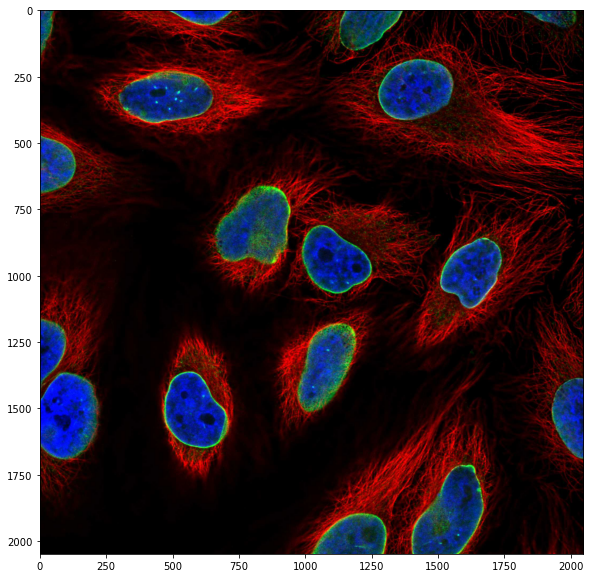

In [4]:
plt.subplots(figsize=(10,10))
plt.imshow(image_stack);

We have again a three channel image, i.e. our image is composed of three planes. For the moment we only want to work with the nuclei, so we isolate that channel, the third one: 

In [5]:
image_nuclei = image_stack[:,:,2]

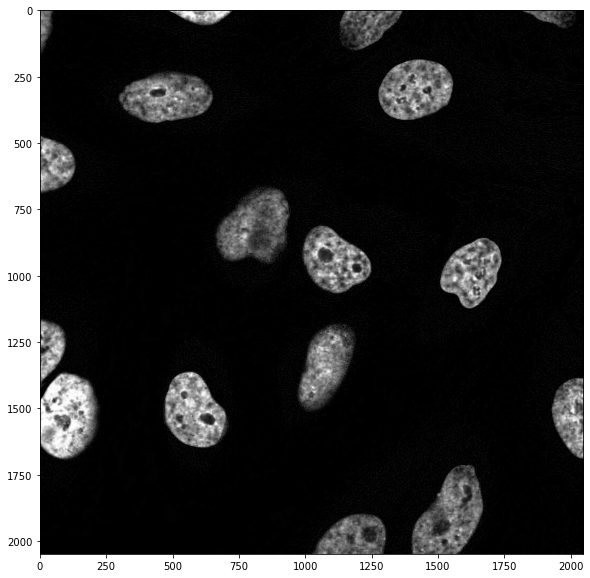

In [6]:
plt.subplots(figsize=(10,10))
plt.imshow(image_nuclei, cmap = 'gray');

## 9.2 Manual investigation

We have seen in the previous chapter that if we want to isolate nuclei, we have to know more or less what intensity they have so that we can use a cutoff value on pixel intensities. We can look at the histogram of pixel values:

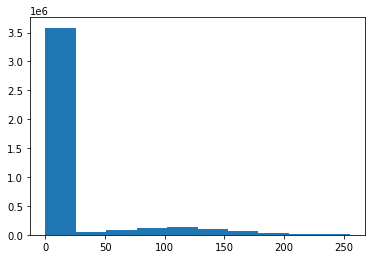

In [8]:
plt.hist(np.ravel(image_nuclei));

Clearly we have background intensity between 0 and ~50, and the signal spread out between 50 and 255. We can create a mask of all the pixels with a value above 50: 

In [9]:
mask = image_nuclei > 50

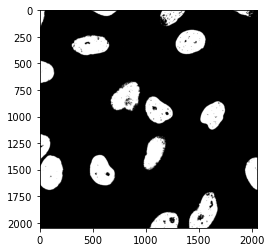

In [10]:
plt.imshow(mask, cmap = 'gray');

For the sake of the experiment, let's use a higher threshold:

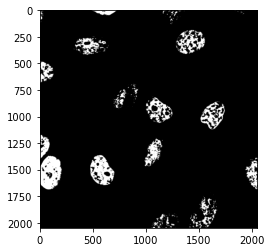

In [12]:
mask = image_nuclei > 120
plt.imshow(mask, cmap = 'gray');

Clearly, if the threshold is too high, we loose import parts of the image.

## 9.3 Automatic thresholding

Setting a threshold manually is not ideal for two reasons: 1. your eyes might fool you, and 2. if you have to do this operation on 100s of images you don't want to do it by hand.

Several methods have been developed to detect an "ideal" threshold based on the pixel histogram. One of the most famous ones is the Otsu method: it sets a threshold by dividing the pixels in two classes and tries to minimize the variance of both classes.

Such classical algorithms are all implemented in Scikit-Image and we can just use them out of the box. All algorithm are grouped in logical groups (filtering, measuring etc.) Often the easiest is just to use Google to find them.

For example the [Otsu algorithm](https://www.google.com/search?q=skimage+otsu&oq=skimage+otsu&aqs=chrome..69i57j69i60j0l4.2268j0j7&sourceid=chrome&ie=UTF-8):

In [13]:
import skimage.filters

help(skimage.filters.threshold_otsu)

Help on function threshold_otsu in module skimage.filters.thresholding:

threshold_otsu(image=None, nbins=256, *, hist=None)
    Return threshold value based on Otsu's method.
    
    Either image or hist must be provided. If hist is provided, the actual
    histogram of the image is ignored.
    
    Parameters
    ----------
    image : (N, M) ndarray, optional
        Grayscale input image.
    nbins : int, optional
        Number of bins used to calculate histogram. This value is ignored for
        integer arrays.
    hist : array, or 2-tuple of arrays, optional
        Histogram from which to determine the threshold, and optionally a
        corresponding array of bin center intensities.
        An alternative use of this function is to pass it only hist.
    
    Returns
    -------
    threshold : float
        Upper threshold value. All pixels with an intensity higher than
        this value are assumed to be foreground.
    
    References
    ----------
    .. [1] Wikipedia

In [14]:
my_otsu_threshold = skimage.filters.threshold_otsu(image_nuclei)
print(my_otsu_threshold)

66


Using that value we can create a new mask:

In [15]:
mask_nuclei = image_nuclei > my_otsu_threshold

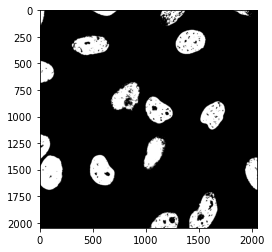

In [16]:
plt.imshow(mask_nuclei, cmap = 'gray');

## 9.4 Combining masks

We can do the same thresholding operation on the other channel contained in the image. Let's first "isolate" the first channel (red):

In [25]:
image_cells = image_stack[:,:,0]

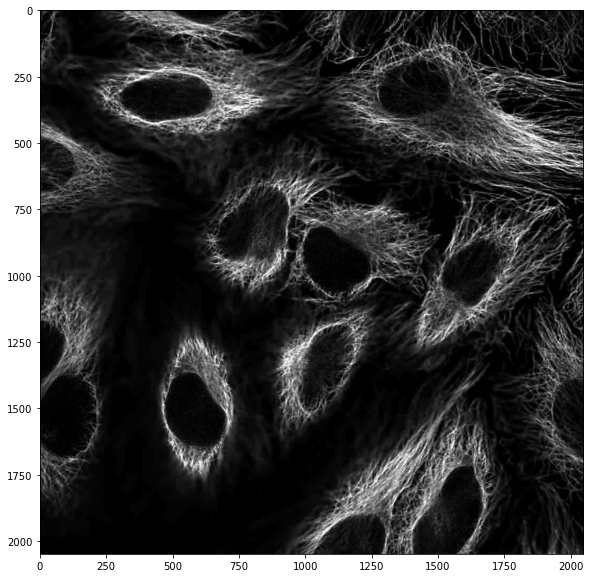

In [26]:
plt.subplots(figsize=(10,10))
plt.imshow(image_cells, cmap = 'gray');

In [27]:
mask_cells = image_cells > skimage.filters.threshold_otsu(image_cells)

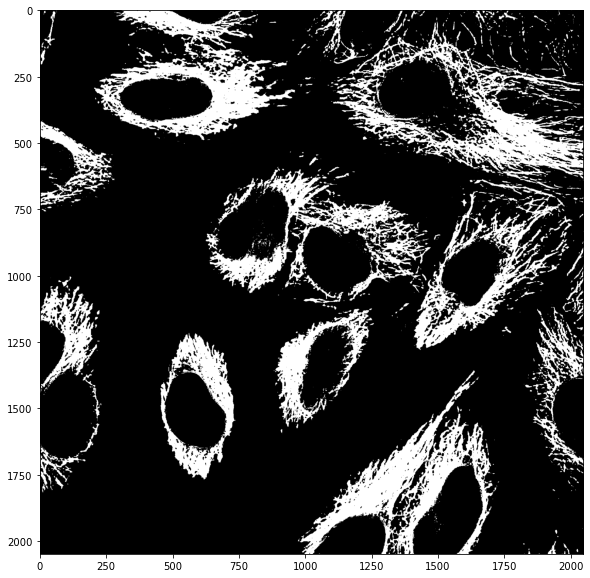

In [28]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells, cmap = 'gray');

We can in principle combine masks however we want. For example we can consider pixels that are ON in both mask using ```*```

In [32]:
both_masks = mask_cells * mask_nuclei

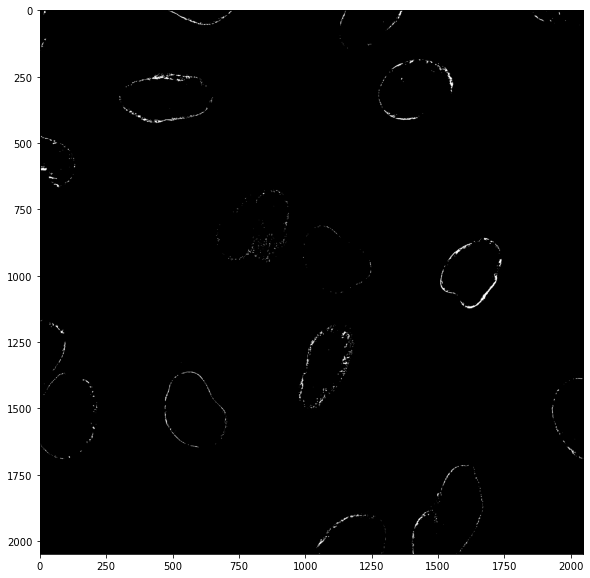

In [34]:
plt.subplots(figsize=(10,10))
plt.imshow(both_masks, cmap = 'gray');

or we can consider pixels that are ON in one OR the other image with a ```+``` operation:

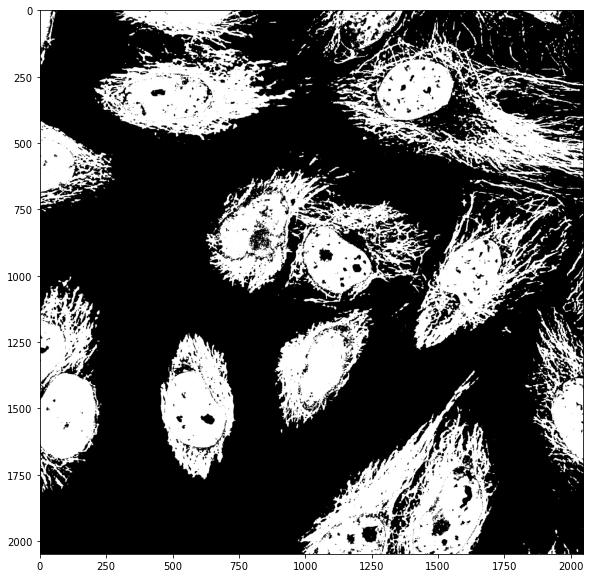

In [35]:
plt.subplots(figsize=(10,10))
plt.imshow(mask_cells + mask_nuclei, cmap = 'gray');

Finally, Numpy has a series of functions to do such logical operations on masks. For example the OR operation:

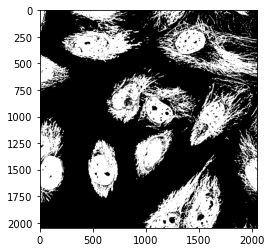

In [36]:
combine_or = np.logical_or(mask_cells, mask_nuclei)
plt.imshow(combine_or, cmap = 'gray');

Now that we have **segmented** elements in our image, we want to be able to quantify those elements, which is what is done in chapter 11. In part 10 we can see how we can improve the masks by cleaning them up using binary/morphological operations.